In [1]:
from Bio import SeqIO
from Bio.SeqUtils import GC

import forgi #this module helps to extract secondary structure elements from dot-bracket notation

import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse secondary structure predictions for the aptamers
- [Count secondary structure elements](#section1)
- [Generate plots](#section2)
- [Rank aptamers based on energy](#section3)

<a id='section1'></a>
## Count secondary structure elements

In [7]:
# load data on folding
aptamers_data = pd.read_csv('../1_secondary_structure/folded_aptamers.csv', index_col=0)
aptamers_data.head()

,aptamer_name,sequence,ligand_name,ligand_smiles,seqfold,seqfold_ddg,rnafold,rnafold_ddg,nupack,nupack_ddg
0,1:5712:7645:250,TAGGGAAGAGAAGGACATATGATGGGTGAGAGATTAGGACAGTGGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..................((.(...).)...,-1.5,........................(((.(...(((((..(((((.....,-12.7,...............((.....))................(((((....,-7.691229
1,:27565:7075:250,TAGGGAAGAGAAGGACATATGATCACGGACCCGCTAAGTCGGACAC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((.............(((((.((.....))...,-1.3,..(((........................)))((((.((((.((.....,-7.9,........................(((...(((......))).((....,-9.261780
2,:2112:10408:250,TAGGGAAGAGAAGGACATATGATGGGTTGCTGGGGCGGGCATCTCC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........(((.((..........))...,-3.7,........................(((((((((((((.((.........,-15.0,.......((((....((.....))...(((........)))))))(...,-9.930738
3,:3805:10054:250,TAGGGAAGAGAAGGACATATGATCGGATACACAAATGGATGTCCAG...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........((.((..(((....)))....,-2.7,............((((((......(......)......)))))).(...,-9.8,............((((((....................)))))).....,-10.109587
4,:24393:9571:250,TAGGGAAGAGAAGGACATATGATCACACTTAACACGCAAACCACGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((...............................,0.2,..((..((((..(((....................((.......))...,-4.9,...((..((((((..............)))....((.......)))...,-7.164472


**Below is an example for seqfold prediction analysis**

In [8]:
# change this if you want to analyse any other algorithm
algorithm_to_analyze = 'seqfold'

# found structural elements
structural_elements = []
unique_elements = []

for fold in aptamers_data[algorithm_to_analyze]:
    structs = [] #сюда запишем структурные элементы    
    
    # some fold especially from rnafold may contain G-quadruplexes marked as .
    # these are not recognized by forgi so we delete them
    bg, = forgi.load_rna(fold.replace("+", "."))
    
    info = bg.to_bg_string().split('\n')[:-1] # save data
    
    for i in info: 
        if i.split()[0] == 'define':
            structs.append(i.split()[1][0]) # leave the structural element code
    
    #сохраняем всю информацию об элементах структуры
    structural_elements.append(structs) 
    
    #дополняем наш лист структурных элементов
    for struct in structs:
        if struct not in unique_elements:
            unique_elements.append(struct)
    
print(f"Found elements: {' '.join(unique_elements)}")
aptamers_data['structural_elements'] = structural_elements
aptamers_data.head()

Found elements: f s i h t m


,aptamer_name,sequence,ligand_name,ligand_smiles,seqfold,seqfold_ddg,rnafold,rnafold_ddg,nupack,nupack_ddg,structural_elements
0,1:5712:7645:250,TAGGGAAGAGAAGGACATATGATGGGTGAGAGATTAGGACAGTGGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..................((.(...).)...,-1.5,........................(((.(...(((((..(((((.....,-12.7,...............((.....))................(((((....,-7.691229,"[f, s, i, s, i, s, h, t]"
1,:27565:7075:250,TAGGGAAGAGAAGGACATATGATCACGGACCCGCTAAGTCGGACAC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((.............(((((.((.....))...,-1.3,..(((........................)))((((.((((.((.....,-7.9,........................(((...(((......))).((....,-9.261780,"[f, s, i, s, i, s, s, i, i, s, h, t]"
2,:2112:10408:250,TAGGGAAGAGAAGGACATATGATGGGTTGCTGGGGCGGGCATCTCC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........(((.((..........))...,-3.7,........................(((((((((((((.((.........,-15.0,.......((((....((.....))...(((........)))))))(...,-9.930738,"[f, s, i, s, i, s, i, s, h, t]"
3,:3805:10054:250,TAGGGAAGAGAAGGACATATGATCGGATACACAAATGGATGTCCAG...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........((.((..(((....)))....,-2.7,............((((((......(......)......)))))).(...,-9.8,............((((((....................)))))).....,-10.109587,"[f, s, i, s, i, s, i, s, i, s, h, t]"
4,:24393:9571:250,TAGGGAAGAGAAGGACATATGATCACACTTAACACGCAAACCACGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((...............................,0.2,..((..((((..(((....................((.......))...,-4.9,...((..((((((..............)))....((.......)))...,-7.164472,"[f, s, i, s, h, t]"


**Comment:** f and t are 5- и 3-ends. s - stem, i - interiour loop, h - hairpin, m - multiloop.

In [9]:
# add GC%
aptamers_data['GC%'] = aptamers_data.apply(lambda row: GC(row.sequence), axis=1)

# base pare count
num_base_pairs = [fold.count('(') for fold in aptamers_data[algorithm_to_analyze]]
aptamers_data['num_base_pairs'] = num_base_pairs

# count structural elements
aptamers_data['STEM'] = aptamers_data.apply(lambda row: row.structural_elements.count('s'), axis=1)
aptamers_data['INTERIOR_LOOP'] = aptamers_data.apply(lambda row: row.structural_elements.count('i'), axis=1)
aptamers_data['MULTILOOP'] = aptamers_data.apply(lambda row: row.structural_elements.count('m'), axis=1)
aptamers_data['HAIRPIN'] = aptamers_data.apply(lambda row: row.structural_elements.count('h'), axis=1)


# add data on G-quadruplexes
G_quadruplexes = [int('+' in fold) for fold in aptamers_data[algorithm_to_analyze]]
aptamers_data['G_quadruplex'] = G_quadruplexes

aptamers_data.head()

,aptamer_name,sequence,ligand_name,ligand_smiles,seqfold,seqfold_ddg,rnafold,rnafold_ddg,nupack,nupack_ddg,structural_elements,GC%,num_base_pairs,STEM,INTERIOR_LOOP,MULTILOOP,HAIRPIN,G_quadruplex
0,1:5712:7645:250,TAGGGAAGAGAAGGACATATGATGGGTGAGAGATTAGGACAGTGGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..................((.(...).)...,-1.5,........................(((.(...(((((..(((((.....,-12.7,...............((.....))................(((((....,-7.691229,"[f, s, i, s, i, s, h, t]",47.368421,8,3,2,0,1,0
1,:27565:7075:250,TAGGGAAGAGAAGGACATATGATCACGGACCCGCTAAGTCGGACAC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((.............(((((.((.....))...,-1.3,..(((........................)))((((.((((.((.....,-7.9,........................(((...(((......))).((....,-9.261780,"[f, s, i, s, i, s, s, i, i, s, h, t]",48.684211,12,5,4,0,1,0
2,:2112:10408:250,TAGGGAAGAGAAGGACATATGATGGGTTGCTGGGGCGGGCATCTCC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........(((.((..........))...,-3.7,........................(((((((((((((.((.........,-15.0,.......((((....((.....))...(((........)))))))(...,-9.930738,"[f, s, i, s, i, s, i, s, h, t]",52.631579,10,4,3,0,1,0
3,:3805:10054:250,TAGGGAAGAGAAGGACATATGATCGGATACACAAATGGATGTCCAG...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((..........((.((..(((....)))....,-2.7,............((((((......(......)......)))))).(...,-9.8,............((((((....................)))))).....,-10.109587,"[f, s, i, s, i, s, i, s, i, s, h, t]",43.421053,12,5,4,0,1,0
4,:24393:9571:250,TAGGGAAGAGAAGGACATATGATCACACTTAACACGCAAACCACGC...,nivalenol,CC1=CC2C(C(C1=O)O)(C3(C(C(C(C34CO4)O2)O)O)C)CO,............((.(((...............................,0.2,..((..((((..(((....................((.......))...,-4.9,...((..((((((..............)))....((.......)))...,-7.164472,"[f, s, i, s, h, t]",44.736842,5,2,1,0,1,0


In [10]:
# check typing
aptamers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 3406
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   aptamer_name         3407 non-null   object 
 1   sequence             3407 non-null   object 
 2   ligand_name          3407 non-null   object 
 3   ligand_smiles        3407 non-null   object 
 4   seqfold              3407 non-null   object 
 5   seqfold_ddg          3407 non-null   float64
 6   rnafold              3407 non-null   object 
 7   rnafold_ddg          3407 non-null   float64
 8   nupack               3407 non-null   object 
 9   nupack_ddg           3407 non-null   float64
 10  structural_elements  3407 non-null   object 
 11  GC%                  3407 non-null   float64
 12  num_base_pairs       3407 non-null   int64  
 13  STEM                 3407 non-null   int64  
 14  INTERIOR_LOOP        3407 non-null   int64  
 15  MULTILOOP            3407 non-null   i

<a id='section2'></a>
## Generate plots

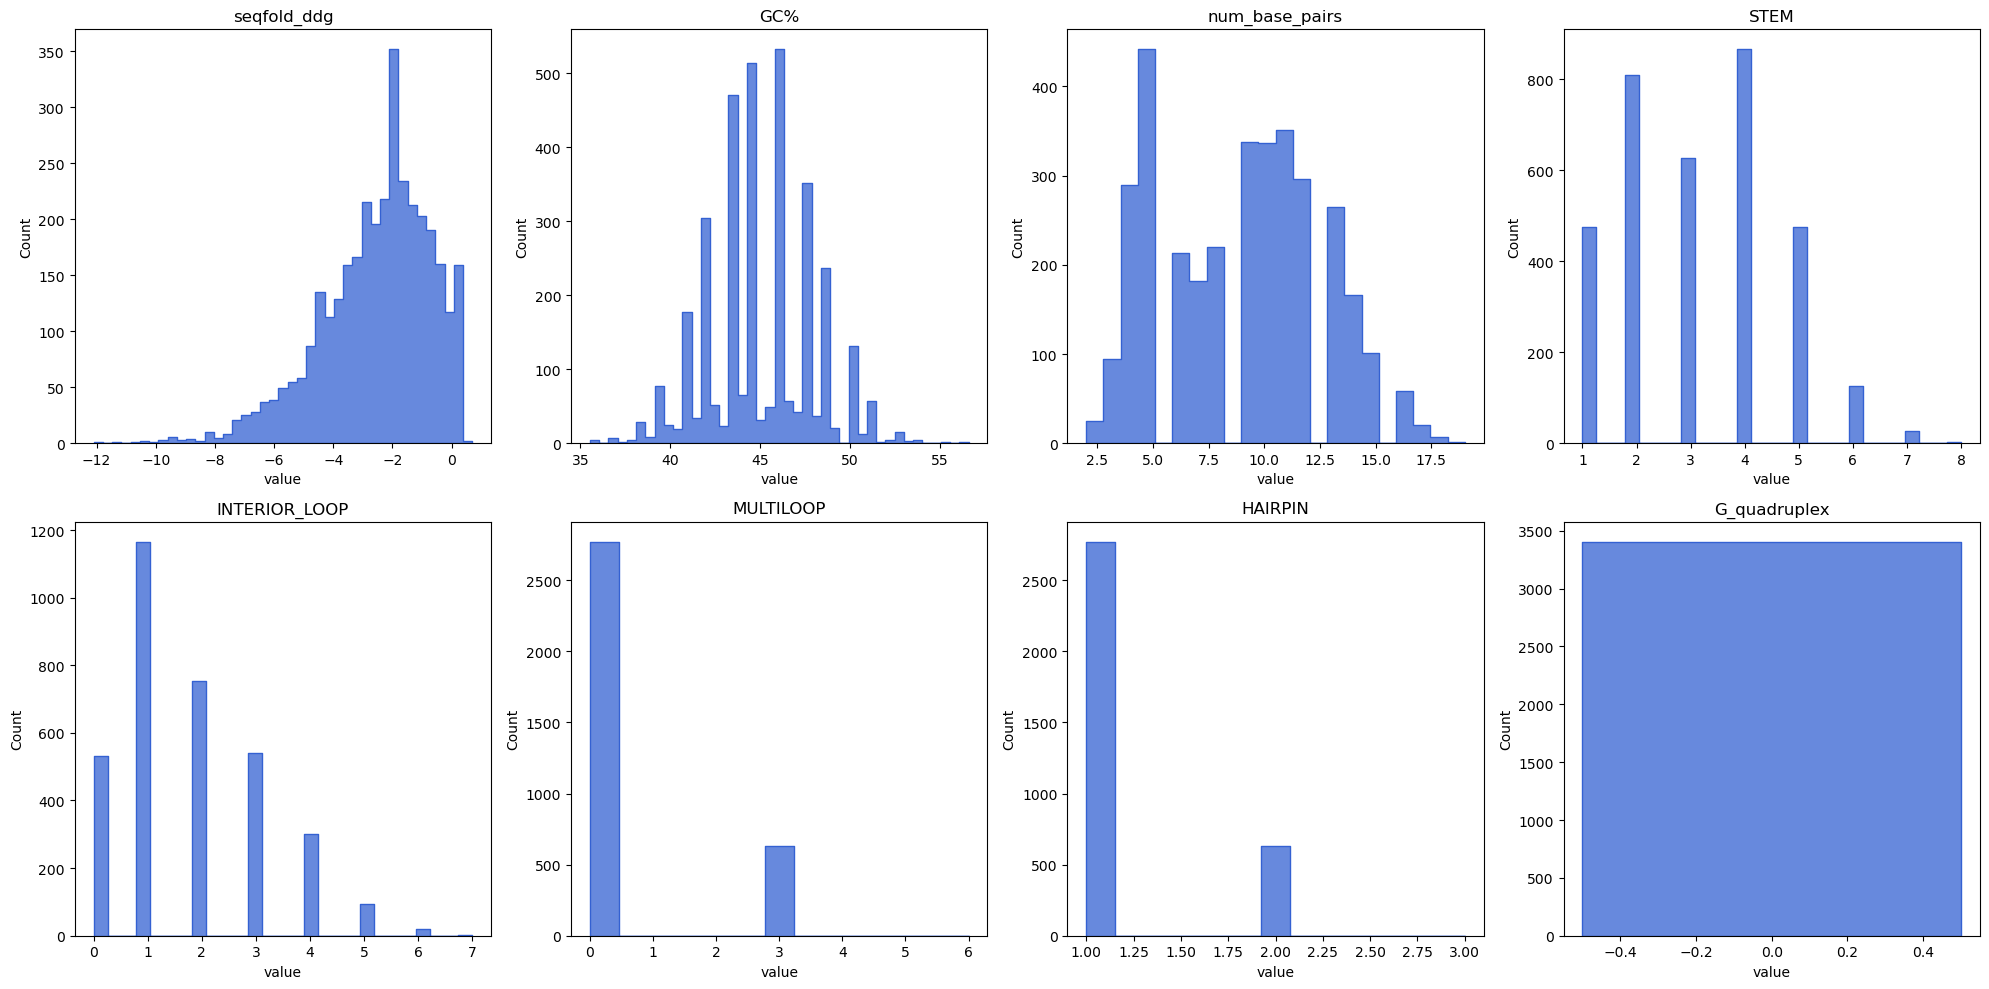

In [11]:
# parameter distributions

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate([f'{algorithm_to_analyze}_ddg'] + list(aptamers_data.columns.values[-7:])):
    sns.histplot(aptamers_data[col], color = '#3461d2', element='step', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('value')
    
plt.tight_layout()
plt.show()

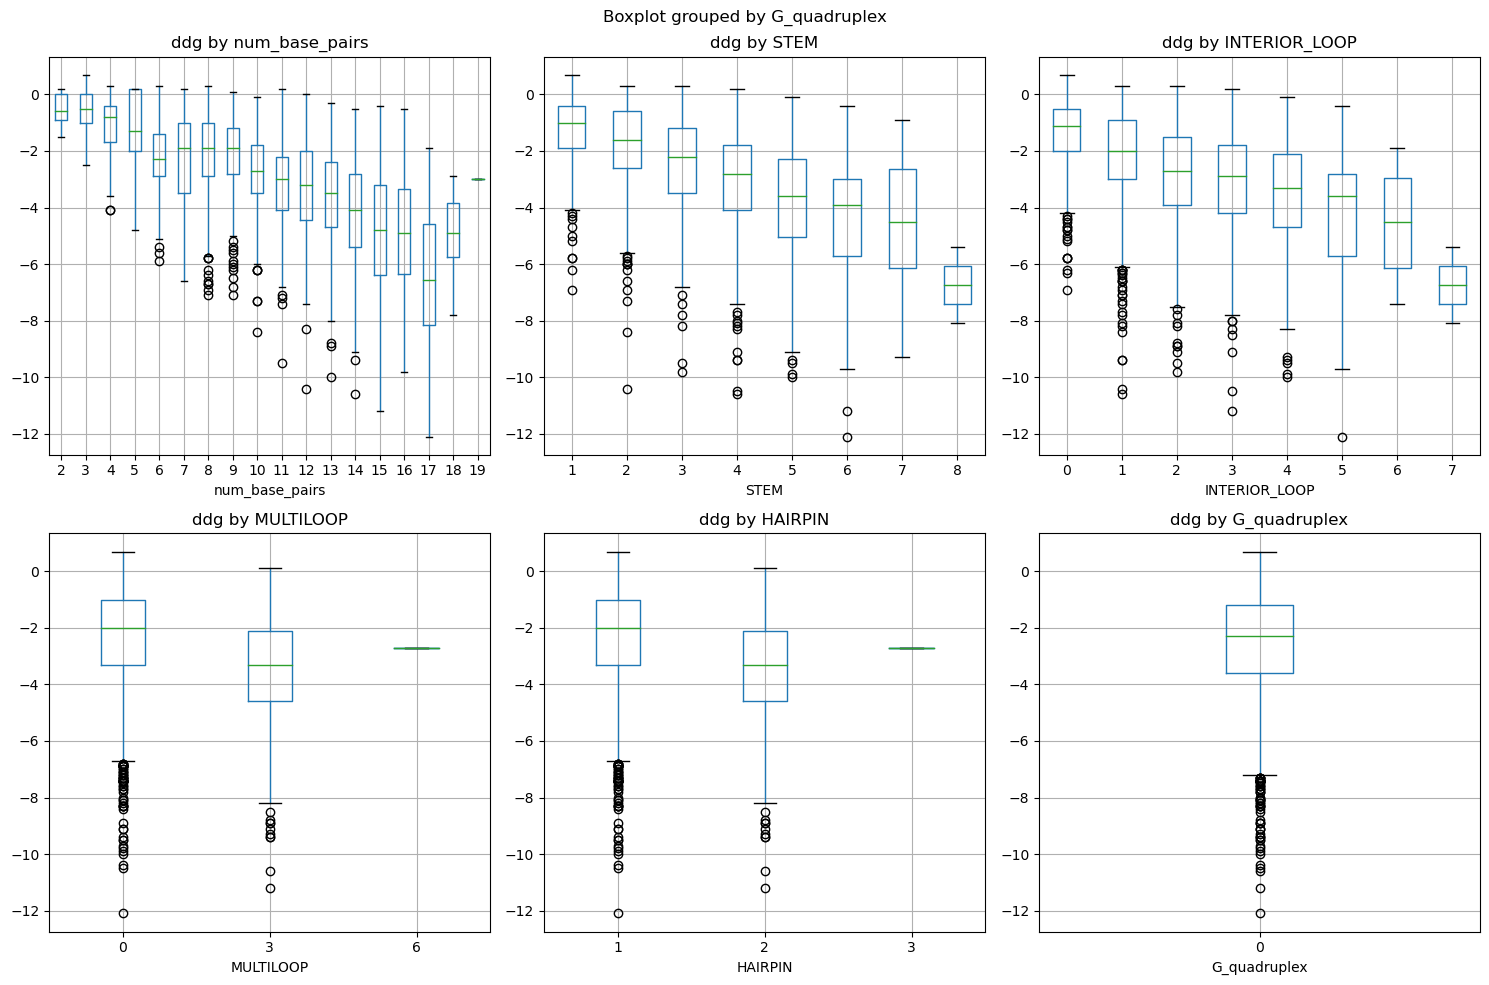

In [19]:
# whiskers plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(list(aptamers_data.columns.values[-6:])):
    aptamers_data.boxplot(column=[f'{algorithm_to_analyze}_ddg'], by=col, ax=axes[i])
    axes[i].set_title(f"ddg by {col}")

plt.tight_layout()
plt.show()

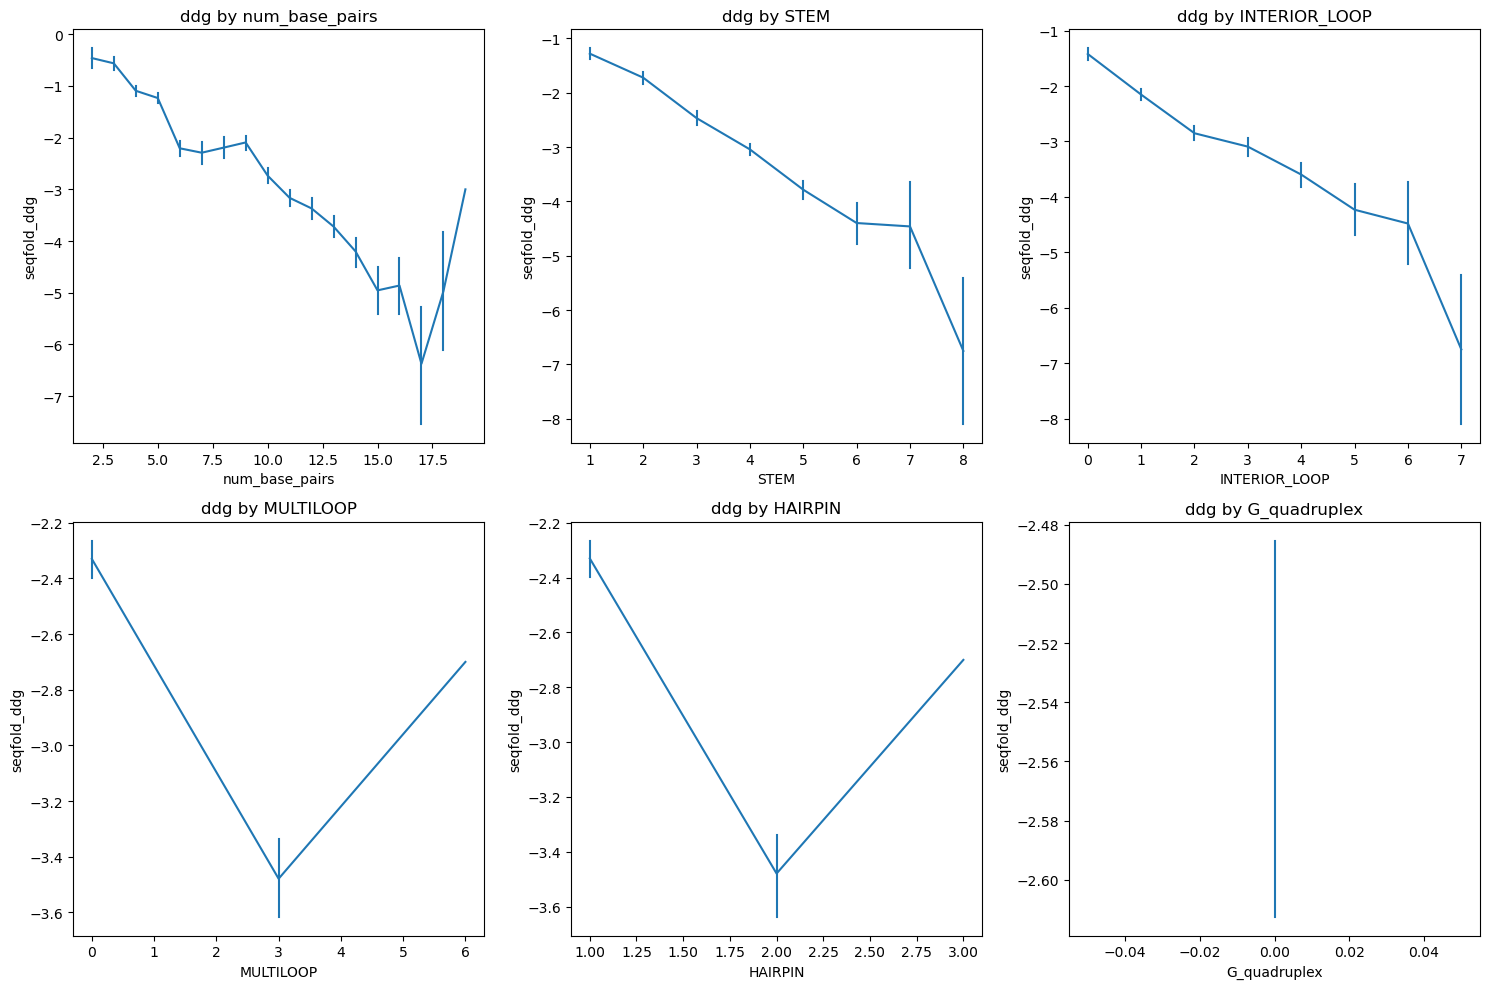

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(list(aptamers_data.columns.values[-6:])):
    sns.lineplot(x=col, y=f'{algorithm_to_analyze}_ddg', err_style='bars', data=aptamers_data, ax=axes[i])
    axes[i].set_title(f"ddg by {col}")

plt.tight_layout()
plt.show()

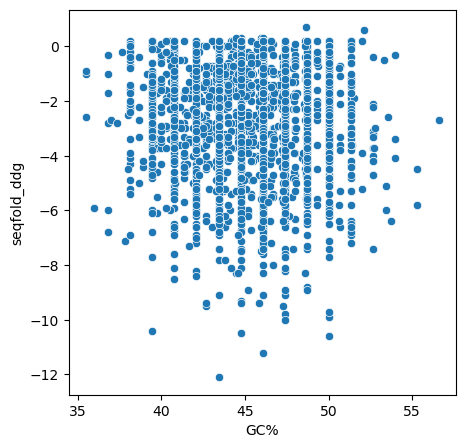

In [24]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=aptamers_data, y=f'{algorithm_to_analyze}_ddg', x='GC%')

plt.show()

In [25]:
from scipy.stats import kendalltau, pearsonr, spearmanr, linregress

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2

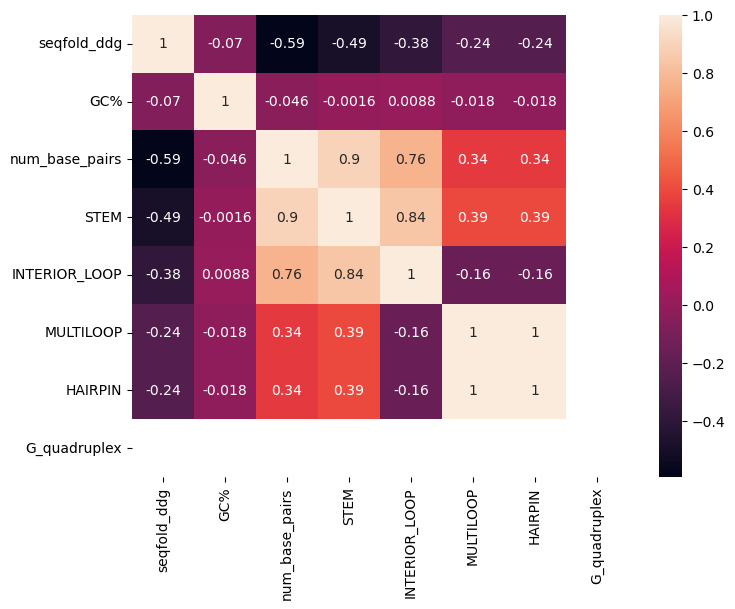

In [31]:
# correlations as heat map
plt.figure(figsize=(8, 6))
sns.heatmap(aptamers_data[[f'{algorithm_to_analyze}_ddg'] + list(aptamers_data.columns.values[-7:])].corr(),
            annot = True)

plt.show()

/Users/aleksandrkovalenko/opt/anaconda3/envs/chemoinf/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


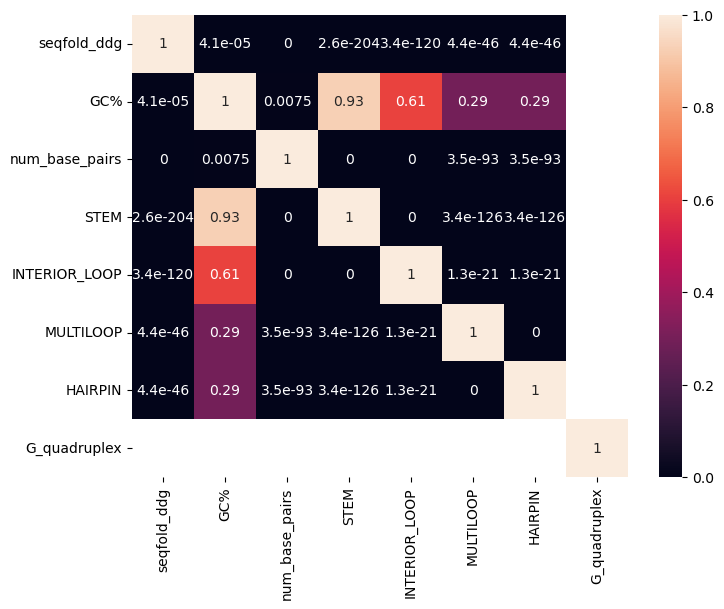

In [32]:
#p-values
plt.figure(figsize=(8, 6))
sns.heatmap(aptamers_data[[f'{algorithm_to_analyze}_ddg'] + list(aptamers_data.columns.values[-7:])].corr(method = pearsonr_pval),
            annot = True)

plt.show()

<a id='section3'></a>
## Rank aptamers based on energy

In [35]:
features_to_sort_by = ['seqfold_ddg', 'rnafold_ddg', 'nupack_ddg']
n_top_to_select = 100
n_bottom_to_select = 100

# tops
tops = []
for reature in features_to_sort_by:
    top = set(aptamers_data.sort_values(by=reature).head(n_top_to_select)['aptamer_name'])
    tops.append(top)
    
# the inersection
top = tops[0].intersection(*tops)
print(f"Listed {len(top)} top aptamers by {', '.join(features_to_sort_by)} after selecting top-{n_top_to_select} by each feature")

# bottoms
bottoms = []
for reature in features_to_sort_by:
    bottom = set(aptamers_data.sort_values(by=reature).tail(n_top_to_select)['aptamer_name'])
    bottoms.append(top)
    
# the inersection
bottom = bottoms[0].intersection(*bottoms)
print(f"Listed {len(bottom)} bottom aptamers by {', '.join(features_to_sort_by)} after selecting bottom-{n_bottom_to_select} by each feature")

Listed 9 top aptamers by seqfold_ddg, rnafold_ddg, nupack_ddg after selecting top-100 by each feature
Listed 9 bottom aptamers by seqfold_ddg, rnafold_ddg, nupack_ddg after selecting bottom-100 by each feature


In [38]:
# save these sets
aptamers_data[aptamers_data['aptamer_name'].isin(top)].to_csv('folded_aptamers_top.csv')
aptamers_data[aptamers_data['aptamer_name'].isin(bottom)].to_csv('folded_aptamers_bottom.csv')